In [ ]:
# для нейронной сети
import torch
import torch.nn as nn
import torch.optim as optim
# для графиков
import matplotlib.pyplot as plt

In [ ]:
# реализация сети
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

In [ ]:
def init_and_train(inputs, targets, epochs):
    net = Net()

    inputs = torch.tensor(inputs, dtype=torch.float32)
    targets = torch.tensor(targets, dtype=torch.float32)

    criterion = nn.MSELoss() # функция ошибки
    optimizer = optim.SGD(net.parameters(), lr=0.1) # метод оптимизации

    loss_values = []

    print('Начальные коэффициенты')
    for name, param in net.named_parameters():
      print(f'{name}: {param}')

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        loss_values.append(loss.item())



    plt.plot(range(epochs), loss_values)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

    test_outputs = net(inputs)
    print(f'Results:\n {test_outputs.round().detach().numpy()}')

    print('Коэффициенты после обучения')
    for name, param in net.named_parameters():
      print(f'{name}: {param}')

Начальные коэффициенты
fc.weight: Parameter containing:
tensor([[-0.1644,  0.1333]], requires_grad=True)
fc.bias: Parameter containing:
tensor([0.1960], requires_grad=True)


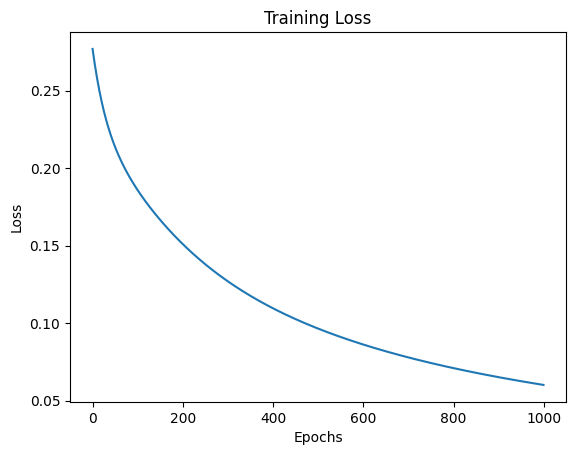

Results:
 [[0.]
 [0.]
 [0.]
 [1.]]
Коэффициенты после обучения
fc.weight: Parameter containing:
tensor([[1.7900, 1.7990]], requires_grad=True)
fc.bias: Parameter containing:
tensor([-2.8512], requires_grad=True)


In [ ]:
# конъюнкция
init_and_train(inputs = [[0, 0], [0, 1], [1, 0], [1, 1]], targets = [[0], [0], [0], [1]], epochs = 1000)

Начальные коэффициенты
fc.weight: Parameter containing:
tensor([[-0.6017, -0.2371]], requires_grad=True)
fc.bias: Parameter containing:
tensor([-0.5763], requires_grad=True)


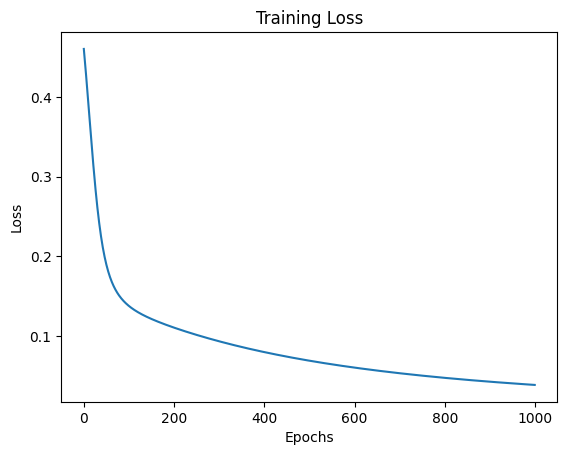

Results:
 [[0.]
 [1.]
 [1.]
 [1.]]
Коэффициенты после обучения
fc.weight: Parameter containing:
tensor([[2.3659, 2.3975]], requires_grad=True)
fc.bias: Parameter containing:
tensor([-0.8182], requires_grad=True)


In [ ]:
# дизъюнкция
init_and_train(inputs = [[0, 0], [0, 1], [1, 0], [1, 1]], targets = [[0], [1], [1], [1]], epochs = 1000)